<a href="https://colab.research.google.com/github/vijayakakumani/AIML/blob/master/Word2Vec_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Not for Grading

#  Word2Vec Similarity

This experiment is to understand the visualization of Word2Vec representations.


### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181901807" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1W1_CS_2_Word2Vec_Similarity" #name of the notebook

def setup():
    ipython.magic("sx wget https://www.dropbox.com/s/fm7nvhyvekhaka4/AIML_DS_WORD2VEC2D_STD.pkl.zip?dl=1")
    ipython.magic("sx mv AIML_DS_WORD2VEC2D_STD.pkl.zip?dl=1 AIML_DS_WORD2VEC2D_STD.pkl.zip")
    ipython.magic("sx unzip AIML_DS_WORD2VEC2D_STD.pkl.zip")
    ipython.magic("sx wget https://www.dropbox.com/s/9xivz2pox1i83td/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1")
    ipython.magic("sx AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
    #ipython.magic("sx unzip AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.pkl.zip")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


##Importing required packages

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import gensim
import matplotlib.pyplot as plt

##Loading Word2vec pretrained model

In [8]:
ls

'AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1'
 AIML_DS_NEWSGROUPS_PICKELFILE.pkl
 AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt
'AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1'
 AIML_DS_WORD2VEC2D_STD.pkl
 AIML_DS_WORD2VEC2D_STD.pkl.zip
 M1E1_BOW_20newsgroup.ipynb
 M1E3_Stochastic_Minibatch_GD.ipynb
 M1W1_CS_2_Word2Vec_Similarity.ipynb
 sample_data/


In [0]:
import os
os.replace('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1', 'AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin')

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)

In [0]:
words = ['man', 'woman', 'king', 'queen']

In [0]:
%matplotlib inline

##Visualising and plotting the reduced word2vec representations

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def words_plot(words, word_pairs, elev=20, azim=32, dimensions = 3, lines = True):
  #print(word_pairs)
  embeddings = []
  #print(words)
  for word in words:
    embeddings.append(model[word])
  embeddings = np.array(embeddings)
  
  
  if dimensions == 3:
    embedding_3d = TSNE(n_components=3).fit_transform(embeddings)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for index, ( x, y, z) in enumerate(embedding_3d):
      ax.scatter(x, y, z, c='r', marker='o')
      ax.text(x, y, z, words[index])
    if lines:
      for pair in word_pairs:
        #print(word_pairs)
        xplt, yplt, zplt = [], [], []
        for word in pair:
          #print(word)
          sn = words.index(word)
          xw,yw,zw = embedding_3d[sn]
          xplt.append(xw)
          yplt.append(yw)
          zplt.append(zw)

          ax.plot3D(xplt, yplt,zplt)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.grid(True)
    ax.view_init(elev=elev, azim=azim)
    plt.show()
    
  else:
    embedding_2d = TSNE(n_components=2).fit_transform(embeddings)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for index, ( x, y) in enumerate(embedding_2d):
      ax.scatter(x, y, c='r', marker='o')
      ax.text(x, y, words[index])
    if lines:    
      for pair in word_pairs:
        xplt, yplt= [], []
        for word in pair:
          sn = words.index(word)
          xw,yw = embedding_2d[sn]
          xplt.append(xw)
          yplt.append(yw)

          ax.plot(xplt, yplt)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.grid(True)
    plt.show()

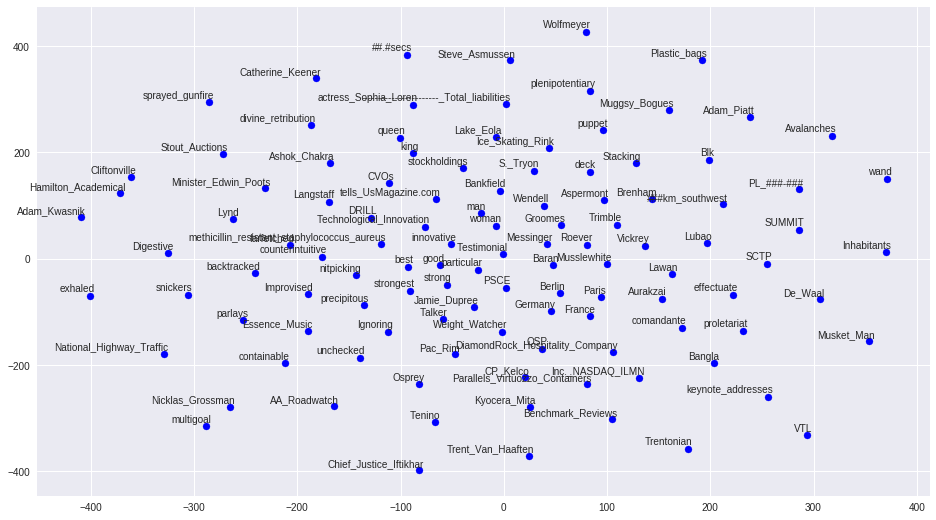

In [14]:
def plot_values(values, labels, figsize = (8,4), c = []):
    x = []
    y = []
    for value in values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=figsize) 
    for i in range(len(labels)):
        plt.scatter(x[i],y[i], color=c[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


import pickle
two_dim_model = pickle.load(open('AIML_DS_WORD2VEC2D_STD.pkl', 'rb'))

wv_labels = {}
for vec, word in two_dim_model:
    wv_labels[word] = vec
    
colors = ['blue' for i in range(len(wv_labels))]

plot_values(wv_labels.values(), list(wv_labels.keys()), figsize = (16, 9), c = colors)

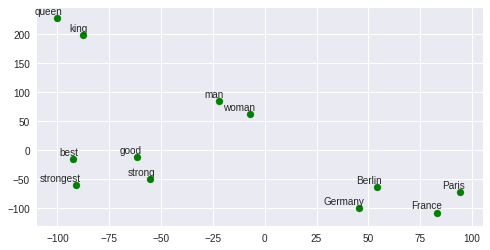

In [0]:
wv_list = ['king', 'queen', 'man', 'woman', 'Germany', 'France', 'Berlin', 'Paris', 'best', 'good', 'strong', 'strongest']
wv_new_labels = {}
for word in wv_list:
    wv_new_labels[word] = wv_labels[word]

colors = ['green' for i in range(len(wv_new_labels))]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

##Representing Man, Woman, King, queen

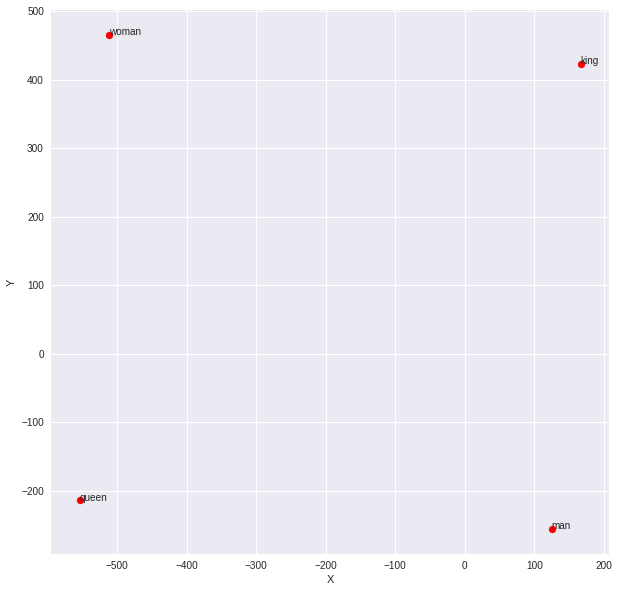

In [0]:
words = ['man', 'woman', 'king', 'queen']
word_pairs = [['man', 'woman'], ['king', 'queen']]
words_plot(words, word_pairs, dimensions=2, lines=False)

##Representing Countries and its capitals

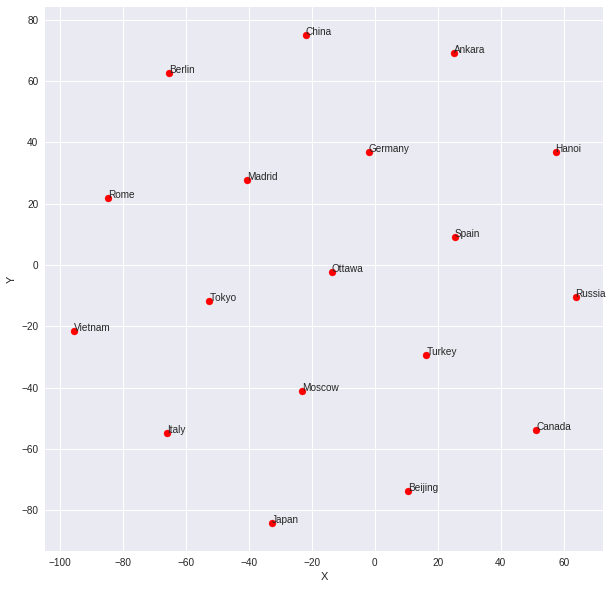

In [0]:
word_pairs =[['Spain', 'Madrid'], ['Italy', 'Rome'], ['Germany', 'Berlin']
              , ['Turkey', 'Ankara'], ['Russia', 'Moscow'], ['Canada', 'Ottawa']
              , ['Japan', 'Tokyo'], ['Vietnam', 'Hanoi'], ['China', 'Beijing']]
words = list(np.array(word_pairs).flatten())
words_plot(words, word_pairs, dimensions=2, lines=False)

##Finding the nearest or most similar words of .a word using Word2vec

In [0]:
words = ['FRANCE','JESUS', 'XBOX', 'Reddish', 'Scratched', 'MB']
for word in words:
  print('Top 10 similar words for {} are:'.format(word))
  for index,  (similar_word, similarity) in enumerate(model.most_similar(word)):
    print("\t {}. {} (similarity is {})".format(index+1, similar_word, similarity) )

Top 10 similar words for FRANCE are:


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


	 1. FRENCH (similarity is 0.6012943983078003)
	 2. BORDEAUX (similarity is 0.5700564980506897)
	 3. BELGIUM (similarity is 0.5691832304000854)
	 4. FRANCE_'S (similarity is 0.563617467880249)
	 5. PHILIPPE (similarity is 0.562414288520813)
	 6. PARIS_FRANCE (similarity is 0.5593119859695435)
	 7. GERMANY (similarity is 0.5551948547363281)
	 8. MOROCCO (similarity is 0.5537819862365723)
	 9. SPAIN (similarity is 0.5528337955474854)
	 10. MARSEILLE (similarity is 0.5447503328323364)
Top 10 similar words for JESUS are:
	 1. HOLY (similarity is 0.6520069241523743)
	 2. SPIRITUAL (similarity is 0.6346266269683838)
	 3. BLESSED (similarity is 0.629273533821106)
	 4. GOD_'S (similarity is 0.6278128623962402)
	 5. GOD (similarity is 0.626646876335144)
	 6. WORSHIP (similarity is 0.6221975684165955)
	 7. FAITH (similarity is 0.6203465461730957)
	 8. BIBLE (similarity is 0.616431474685669)
	 9. THE_WORD (similarity is 0.6132077574729919)
	 10. HEAVEN (similarity is 0.6108883619308472)
Top 10 si

##Verify Clusters in the Word2vec from the following link:

https://projector.tensorflow.org/

##Understand the semantics preserved by Word2vec by chosing the words along x and y axis to represents the other words in that co-oridinate system

https://lamyiowce.github.io/word2viz/